# [1D-BASELINE] Exp5: Fast Positive Swing

## Import

In [1]:
import os
import sys
sys.path.append(os.path.abspath('..'))

In [2]:
import pickle
import math
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
import datetime
import time
from IPython.display import clear_output

In [4]:
from grace.system import Grace
from grace.capture import LeftEyeCapture, RightEyeCapture
from grace.utils import get_center_chessboard_point, generate_triangle_wave

## Initialization

In [5]:
# Experiment Helper Functions

def px_to_deg_fx(x):
    x = math.atan(x/569.4456315)  #LEFT: fx = 569.4456315. fy = 571.54490033
    x = math.degrees(x)
    return x

def save_pickle_data(data, camera: str, name: str):
    # Making Directory
    filename = datetime.datetime.now().strftime("%Y%m%d_%H%M%S_%f") + "_" + camera + "_" + name
    filepath = os.path.join(os.path.abspath(".."), "const_results", filename)

    # Saving to Pickle File
    with open(filepath + ".pickle", 'wb') as file:
        pickle.dump(data, file)
    print('Data saved in:', filepath + ".pickle")
    return filepath + ".pickle"

def slow_reset():
    grace.slow_move_left_eye_pan(angle=-8, step_size=0.0879, time_interval=0.015)
    state = grace.slow_centering_eyes()
    return state
    
def tilt_slow_reset():
    slow_reset()
    state = grace.move_left_eye((None, 0))
    return state
    
def generate_graphs(data, tilt, x_org):
    tilt_idx = tilt_arr.index(tilt)
    
    # Input Array
    plt.figure()
    input_arr  = data["input_arr"]
    plt.plot(input_arr, marker='.',)
    plt.ylim([-20, 20])
    plt.xlabel('Samples')
    plt.ylabel('Input Angle (deg)')
    plt.title('Input Motor Command')
    
    
    ### ('=============Initial Pixel===============')
    
    # Pixel vs Input Array (Raw)
    raw_x_pixel_arr = [x[0] for x in data["init_arr"][tilt_idx]]
    plt.figure()
    plt.plot(input_arr, raw_x_pixel_arr, color='orange', marker='.', linestyle="None")
    plt.xlabel('Input Angle (deg)')
    plt.ylabel('Pixel X Value')
    plt.title('{Initial Raw Pixel Position')
    plt.grid()
    
    # Pixel vs Input Array (Raw)
    x_pixel_arr = [x_org-x[0] for x in data["init_arr"][tilt_idx]]
    plt.figure()
    plt.plot(input_arr, x_pixel_arr, color='orange', marker='.',  linestyle="None")
    plt.xlabel('Input Angle (deg)')
    plt.ylabel('Delta Pixel X Value (wrt 320 px)')
    plt.title('Initial Raw Pixel Position')
    plt.grid()
    
    # Time Series Eye Output vs Input Array
    phi = [px_to_deg_fx(x_org-x[0]) for x in data["init_arr"][tilt_idx]]

    # Eye Output vs Input Array
    plt.figure()
    plt.plot(input_arr, phi, color="orange", marker='.', linestyle="None")
    plt.xlabel('Input Command')
    plt.ylabel('Eye Output')
    plt.title('Initial Pixel Robot Data')
    plt.grid()    
    
    # Histogram (Pixels)
    plt.figure()
    plt.hist(x_pixel_arr)
    plt.xlabel("pixels")
    plt.ylabel("n")
    plt.title("Initial Pixel Distribution")
    mean_val = np.mean(np.array(x_pixel_arr))
    std_val = np.std(np.array(x_pixel_arr))
    print("Init Mean (px):", mean_val)
    print("Init Std (px):", std_val)
    
    
    # Histogram (Angle)
    plt.figure()
    plt.hist(phi)
    plt.xlabel("degrees")
    plt.ylabel("n")
    plt.title("Initial Angle Distribution")
    mean_val = np.mean(np.array(phi))
    std_val = np.std(np.array(phi))
    print("Init Mean (deg):", mean_val)
    print("Init Std (deg):", std_val)
    
    
    ### ('=============Pixel===============')
    
    # Pixel vs Input Array (Raw)
    raw_x_pixel_arr = [x[0] for x in data["pixel_arr"][tilt_idx]]
    plt.figure()
    plt.plot(input_arr, raw_x_pixel_arr, color='orange', marker='.', linestyle="None")
    plt.xlabel('Input Angle (deg)')
    plt.ylabel('Pixel X Value')
    plt.title('Raw Pixel Position')
    plt.grid()
    
    # Pixel vs Input Array (Raw)
    x_pixel_arr = [x_org-x[0] for x in data["pixel_arr"][tilt_idx]]
    plt.figure()
    plt.plot(input_arr, x_pixel_arr, color='orange', marker='.',  linestyle="None")
    plt.xlabel('Input Angle (deg)')
    plt.ylabel('Delta Pixel X Value (wrt 320 px)')
    plt.title('Raw Pixel Position')
    plt.grid()
    
    # Time Series Eye Output vs Input Array
    phi = [px_to_deg_fx(x_org-x[0]) for x in data["pixel_arr"][tilt_idx]]

    # Eye Output vs Input Array
    plt.figure()
    plt.plot(input_arr, phi, color="orange", marker='.', linestyle="None")
    plt.xlabel('Input Command')
    plt.ylabel('Eye Output')
    plt.title('Robot Data')
    plt.grid() 
    
    # Histogram (Pixels)
    plt.figure()
    plt.hist(x_pixel_arr)
    plt.xlabel("pixels")
    plt.ylabel("n")
    plt.title("Target Pixel Distribution")
    mean_val = np.mean(np.array(x_pixel_arr))
    std_val = np.std(np.array(x_pixel_arr))
    print("Target Mean (px):", mean_val)
    print("Target Std (px):", std_val)
    
    
    # Histogram (Angle)
    plt.figure()
    plt.hist(phi)
    plt.xlabel("degrees")
    plt.ylabel("n")
    plt.title("Target Angle Distribution")
    mean_val = np.mean(np.array(phi))
    std_val = np.std(np.array(phi))
    print("Target Mean (deg):", mean_val)
    print("Target Std (deg):", std_val)
    

## Data Analysis

In [6]:
# Opening of Data Pickle File
filename = "20230530_004045_812511_left_1D-BASELINE_EXP5_FastPositiveSwing.pickle"
fn = os.path.join(os.path.abspath(".."), "const_results",filename)
with open(fn, 'rb') as file:
    data_load = pickle.load(file)

def random_colors(n):
    return np.random.rand(n,3)

rand_colors = random_colors(len(data_load["data"]))

(-2.0, 22.0)

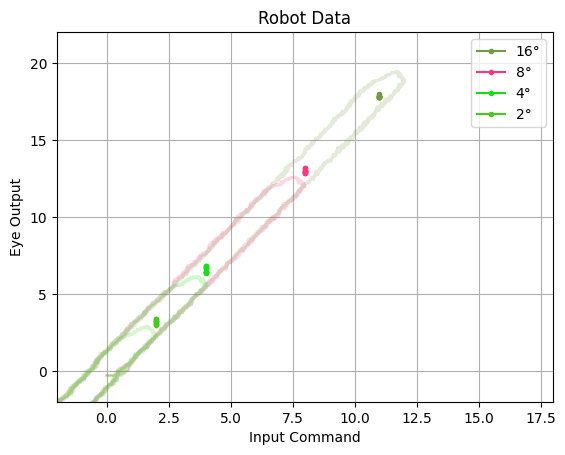

In [7]:
# Data Superposition

%matplotlib inline


# Opening of Data Pickle File
filename = "20230530_004045_812511_left_1D-BASELINE_EXP5_FastPositiveSwing.pickle"
fn = os.path.join(os.path.abspath(".."), "const_results",filename)
with open(fn, 'rb') as file:
    data_load = pickle.load(file)
    

# Opening of Pickle File
filename = "20230530_000517_535176_left_1D-BASELINE_EXP1_RobotBaseline.pickle"
fn = os.path.join(os.path.abspath(".."), "const_results",filename)
with open(fn, 'rb') as file:
    baseline_data = pickle.load(file)

# Parameter
x_org = 315
tilt_idx = 0

# Data Captured
for i in range(len(data_load["data"])):
    input_arr = data_load["data"][i]["input_arr"]
    phi = [px_to_deg_fx(x_org-x[0]) for x in data_load["data"][i]["pixel_arr"][tilt_idx]]

    # Eye Output vs Input Array
    plt.plot(input_arr, phi, marker='.', linestyle=None, color=rand_colors[i])
plt.legend(["16°", "8°", "4°", "2°"])

# Line Data Parameters
for i in range(len(baseline_data["data"])):
    input_arr = baseline_data["data"][i]["input_arr"]
    phi = [px_to_deg_fx(x_org-x[0]) for x in baseline_data["data"][i]["pixel_arr"][tilt_idx]]

    # Eye Output vs Input Array
    plt.plot(input_arr, phi, color=rand_colors[i], alpha=0.2)
    
plt.xlabel('Input Command')
plt.ylabel('Eye Output')
plt.title('Robot Data')
plt.grid()
plt.xlim([-2, 18])
plt.ylim([-2, 22])

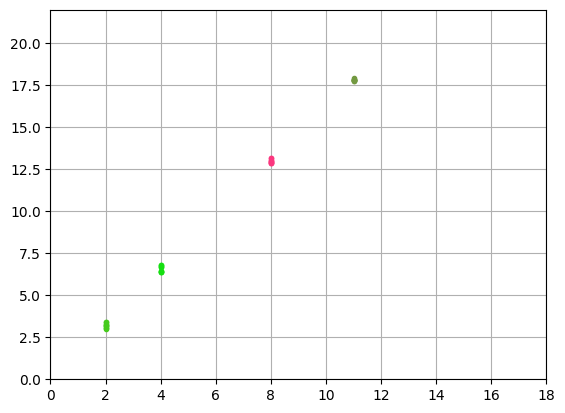

In [8]:
phi_arr = []
for i in range(len(data_load["data"])):
    input_arr = data_load["data"][i]["input_arr"]
    phi = [px_to_deg_fx(x_org-x[0]) for x in data_load["data"][i]["pixel_arr"][tilt_idx]]
    phi_arr.append(phi)

    # Eye Output vs Input Array
    plt.plot(input_arr, phi, marker='.', linestyle=None, color=rand_colors[i])
plt.xlim([0, 18])
plt.ylim([0, 22])
plt.grid()

## Linear Regression

In [9]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# Input

# Sample
# X = np.array([2, 4,6,8,10,12,14,16]).reshape((-1,1))
# Y = np.array([0.1,0.7,1.6,1.8,2.62,3,4,4.57])

# Data Captured
X_arr = []
Y_arr = []
for i in range(len(data_load["data"])):
    input_arr = data_load["data"][i]["input_arr"]
    phi = [px_to_deg_fx(x_org-x[0]) for x in data_load["data"][i]["pixel_arr"][tilt_idx]]

    # Eye Output vs Input Array
    X_arr.extend(input_arr)
    Y_arr.extend(phi)
    
    
X = np.array(X_arr).reshape((-1,1))
Y = np.array(Y_arr)

In [11]:
# Instantiation
regression_model = LinearRegression(fit_intercept=True)

# Fit the data(train the model)
regression_model.fit(X, Y)

# Predict
y_predicted = regression_model.predict(X)

# Evaluation
rmse = mean_squared_error(Y, y_predicted)
r2 = r2_score(Y, y_predicted)

# Printing values
overshoot_slope = regression_model.coef_[0]
overshoot_intercept = regression_model.intercept_
print('Slope:' , overshoot_slope)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: 1.6204963389103815
Intercept: 0.018737909379954232
Root mean squared error:  0.017856283544833148
R2 score:  0.9994423803136554


In [12]:
X_temp = np.append(X, np.array([-5]).reshape(1, -1))
X_n = np.append(X_temp, np.array([20]).reshape(1, -1))
Y_temp = np.append(y_predicted, np.array([regression_model.predict(np.array([-5]).reshape(1, -1))]))
Y_n = np.append(Y_temp, np.array([regression_model.predict(np.array([20]).reshape(1, -1))]))

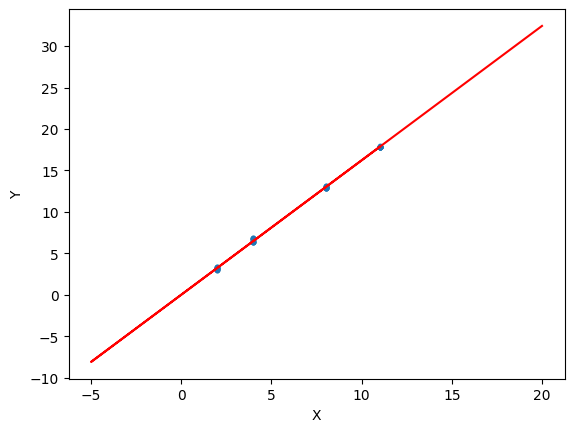

In [13]:
# Plot

# data points
plt.scatter(X, Y, s=10)
plt.xlabel('X')
plt.ylabel('Y')

# predicted values
plt.plot(X_n, Y_n, color='r')
plt.show()

## Linear Regression Baseline Input

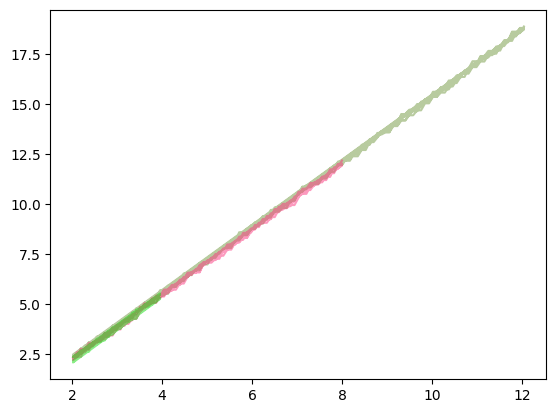

In [14]:
# Line Data Parameters

lim_list = [16, 8, 4, 2]
X_arr = []
Y_arr = []
for i in range(len(baseline_data["data"])):
    pos_log = -1
    input_arr = []
    phi = []
    for cnt, data in enumerate(baseline_data["data"][i]["input_arr"]):
        if data > 2 and data < lim_list[i] and (data-pos_log)>0:
            input_arr.append(data)
            temp = baseline_data["data"][i]["pixel_arr"][tilt_idx][cnt]
            phi.append(px_to_deg_fx(x_org-temp[0]))
        pos_log = data

    X_arr.extend(input_arr)
    Y_arr.extend(phi)
    
    # Eye Output vs Input Array
    plt.plot(input_arr, phi, color=rand_colors[i], alpha=0.5)
    
X = np.array(X_arr).reshape((-1,1))
Y = np.array(Y_arr)

In [15]:
# Instantiation
regression_model = LinearRegression(fit_intercept=True)

# Fit the data(train the model)
regression_model.fit(X, Y)

# Predict
y_predicted_baseline = regression_model.predict(X)

# Evaluation
rmse = mean_squared_error(Y, y_predicted_baseline)
r2 = r2_score(Y, y_predicted_baseline)

# Printing values
base_slope = regression_model.coef_[0]
base_intercept = regression_model.intercept_
print('Slope:' , base_slope)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: 1.6450496338265495
Intercept: -1.084374768298856
Root mean squared error:  0.014597362242511475
R2 score:  0.9993006103768942


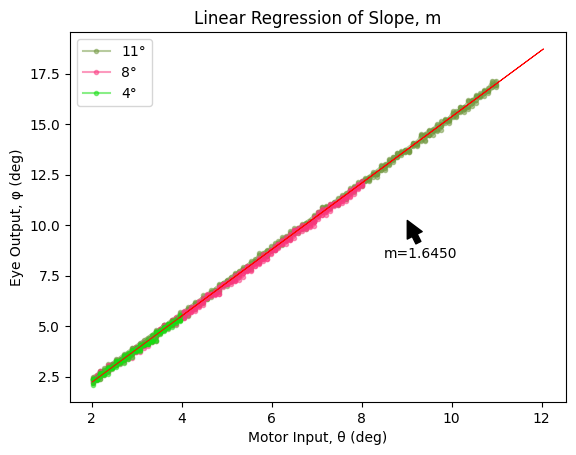

In [16]:
# Plotting

lim_list = [11, 8, 4, 2]
X_arr = []
Y_arr = []
for i in range(len(baseline_data["data"])):
    pos_log = -1
    input_arr = []
    phi = []
    for cnt, data in enumerate(baseline_data["data"][i]["input_arr"]):
        if data > 2 and data < lim_list[i] and (data-pos_log)>0:
            input_arr.append(data)
            temp = baseline_data["data"][i]["pixel_arr"][tilt_idx][cnt]
            phi.append(px_to_deg_fx(x_org-temp[0]))
        pos_log = data

    X_arr.extend(input_arr)
    Y_arr.extend(phi)
    
    # Eye Output vs Input Array
    plt.plot(input_arr, phi, color=rand_colors[i], marker='.', alpha=0.5)
    
# data points
plt.xlabel('Motor Input, θ (deg)')
plt.ylabel('Eye Output, φ (deg)')
plt.title('Linear Regression of Slope, m')
plt.annotate(f'm={base_slope:.4f}',
            xy=(9, 10.3), xycoords='data',
            xytext=(10, -20), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')
plt.legend(["11°", "8°", "4°"])

# predicted values
plt.plot(X, y_predicted_baseline, color='r', linewidth=0.7)
plt.show()

In [17]:
X_temp = np.append(X, np.array([-5]).reshape(1, -1))
X_baseline = np.append(X_temp, np.array([20]).reshape(1, -1))
Y_temp = np.append(y_predicted_baseline, np.array([regression_model.predict(np.array([-5]).reshape(1, -1))]))
Y_baseline = np.append(Y_temp, np.array([regression_model.predict(np.array([20]).reshape(1, -1))]))

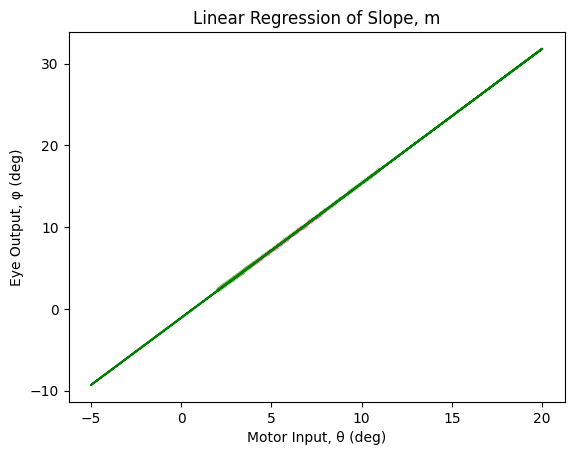

In [18]:
# Plotting

lim_list = [11, 8, 4, 2]
X_arr = []
Y_arr = []
for i in range(len(baseline_data["data"])):
    pos_log = -1
    input_arr = []
    phi = []
    for cnt, data in enumerate(baseline_data["data"][i]["input_arr"]):
        if data > 2 and data < lim_list[i] and (data-pos_log)>0:
            input_arr.append(data)
            temp = baseline_data["data"][i]["pixel_arr"][tilt_idx][cnt]
            phi.append(px_to_deg_fx(x_org-temp[0]))
        pos_log = data

    X_arr.extend(input_arr)
    Y_arr.extend(phi)
    
    # Eye Output vs Input Array
    plt.plot(input_arr, phi, color=rand_colors[i], alpha=0.5)
    
# data points
plt.xlabel('Motor Input, θ (deg)')
plt.ylabel('Eye Output, φ (deg)')
plt.title('Linear Regression of Slope, m')

# predicted values
plt.plot(X_baseline, Y_baseline, color='g')
plt.show()

## Plotting

Text(-40, 30, 'm=1.6205')

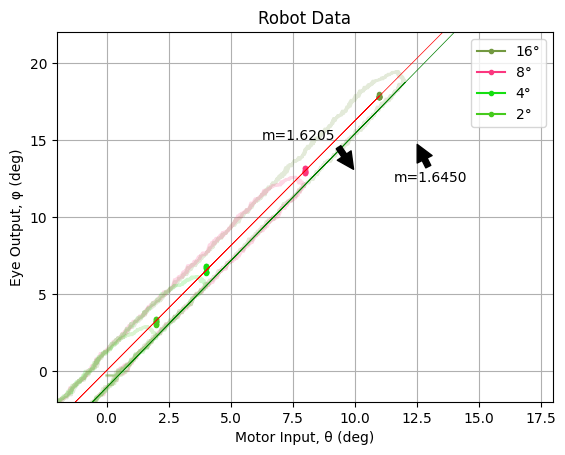

In [19]:
# Data Superposition

%matplotlib inline


# Opening of Data Pickle File
filename = "20230530_004045_812511_left_1D-BASELINE_EXP5_FastPositiveSwing.pickle"
fn = os.path.join(os.path.abspath(".."), "const_results",filename)
with open(fn, 'rb') as file:
    data_load = pickle.load(file)
    

# Opening of Pickle File
filename = "20230530_000517_535176_left_1D-BASELINE_EXP1_RobotBaseline.pickle"
fn = os.path.join(os.path.abspath(".."), "const_results",filename)
with open(fn, 'rb') as file:
    baseline_data = pickle.load(file)

# Parameter
x_org = 315
tilt_idx = 0

# Data Captured
for i in range(len(data_load["data"])):
    input_arr = data_load["data"][i]["input_arr"]
    phi = [px_to_deg_fx(x_org-x[0]) for x in data_load["data"][i]["pixel_arr"][tilt_idx]]

    # Eye Output vs Input Array
    plt.plot(input_arr, phi, marker='.', linestyle=None, color=rand_colors[i])
plt.legend(["16°", "8°", "4°", "2°"])

# Line Data Parameters
for i in range(len(baseline_data["data"])):
    input_arr = baseline_data["data"][i]["input_arr"]
    phi = [px_to_deg_fx(x_org-x[0]) for x in baseline_data["data"][i]["pixel_arr"][tilt_idx]]

    # Eye Output vs Input Array
    plt.plot(input_arr, phi, color=rand_colors[i], alpha=0.2)

plt.plot(X_n, Y_n, color='r', linewidth=0.5)   
plt.plot(X_baseline, Y_baseline, color='g', linewidth=0.5)
    
plt.xlabel('Motor Input, θ (deg)')
plt.ylabel('Eye Output, φ (deg)')
plt.title('Robot Data')
plt.grid()
plt.xlim([-2, 18])
plt.ylim([-2, 22])
plt.annotate(f'm={base_slope:.4f}',
            xy=(12.5, 14.8), xycoords='data',
            xytext=(10, -20), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

plt.annotate(f'm={overshoot_slope:.4f}',
            xy=(10, 13), xycoords='data',
            xytext=(-40, 30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

In [20]:
# Average Slope

ave_slope = (base_slope+overshoot_slope)/2
overshoot = overshoot_intercept - base_intercept
print(f"Average Slope: {ave_slope:.4f}")
print(f"Overshoot: {overshoot:.4f}")

Average Slope: 1.6328
Overshoot: 1.1031


In [21]:
# Testing

lim_list = [11, 8, 4, 2]
slope = 1.6328
mean_arr = []
for i in range(len(phi_arr)):
    temp = np.median(np.array(phi_arr[i]))
    mean_arr.append(temp)
    print('idx','median','predicted',)
    print(i, temp, lim_list[i]*slope)

idx median predicted
0 17.812991850410747 17.9608
idx median predicted
1 12.959527132420526 13.0624
idx median predicted
2 6.569555030974698 6.5312
idx median predicted
3 3.2083327167529205 3.2656
